# **DASI**

# **Predicción de fallo cardiaco**

#**Integrantes**:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

# **25/05/2023**

# **Índice**

*   Objetivos del trabajo
*   Solución planteada
  * Datos de entrada
  * Datos de salida
  * Descripción de los scripts desarrollados
  * Instrucciones para instalar y ejecutar
* Carga de Datos
* Preanálisis de los datos
* Encoders
  * Label Encoder
  * One Hot Encoder
* Árboles de decisión
  * Comprobación de hiperparámetros
  * Resultados finales
* Naive Bayes
  * Naive Bayes con Label Encoder
    * Entrenamiento con diferentes parámetros
    * Resultados de los modelos entrenados
    * Análisis con el mejor de los casos
  * Naive Bayes con One Hot Encoder
    * Entrenamiento con diferentes parámetros
    * Resultados de los modelos entrenados
    * Análisis con el mejor de los casos
* Support Vector Classifier
  * SVC con Label Encoder
    * Entrenamiento con diferentes parámetros
    * Resultados de los modelos entrenados
    * Análisis con el mejor de los casos
  * SVC con One Hot Encoder
    * Entrenamiento con diferentes parámetros
    * Resultados de los modelos entrenados
    * Análisis con el mejor de los casos
* Regresión Logística
  * Función de coste
  * Evaluación y comparativa de parámetros
  * Análisis con el mejor de los casos
* Redes Neuronales
  * Comprobación de hiperparámetros
* Conclusiones
* Trabajo futuro
* Bibliografía

# **Objetivos del trabajo**

Con el avance de la tecnología, cada día hay nuevas fuentes de datos en diversas áreas como la educación, desarrollo social, medicina y otros. 

Un área de interés entre los miembros del equipo ha sido la medicina y el diagnóstico preliminar de enfermedades a través de un modelo de decisiones entrenado a partir de datos existentes.

El propósito del proyecto es realizar una comparación entre distintos modelos de entrenamiento utilizando una misma fuente de datos, comparando la precisión obtenida en cada uno de ellos y obtener conclusiones de qué modelo se puede adaptar mejor.

Para el etrenamiento y comparación se ha escogido el área de predicción de ataques cardíacos basado en el historial clínico (parámetros) del paciente.

# **Solución planteada**

## **Datos de entrada**




Luego de una exhaustiva búsqueda de fuentes de datos, se ha escogido la siguiente (obtenido del sitio web Kaggle):
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Entre los criterios de aceptación para la fuente de datos se evaluó:


* Cantidad de filas (pacientes)
* Cantidad y tipo de columnas proporcionadas (categóricas o numéricas)
* Calificación entre los creadores o usuarios del sitio web (votos)

Para la carga de datos se utiliza la librería de pandas a través de un DataFrame, lo que facilita el manejo y procesado de los datos.

## **Datos de salida**


Los datos de salida son las predicciones y/o precisiones del modelo entrenado. También se acompañan de gráficas que ayuden a entender los resultados.

## **Descripción de los scripts desarrollados** 


Hemos implementado las siguientes técnicas:
* Árboles de decisión
* Naive Bayes
* SVC
* Regresión Logística
* Redes Neuronales

En cada sección explicamos que pasos se han seguido. 

Durante varias secciones del proyecto utilizamos el término **precisión** haciendo referencia a **accuracy** y no a **precision**. 

# **Instrucciones para instalar y ejecutar la práctica**


El trabajo realizado se encuentra en un notebook de python. 
Para ejecutarlo hay dos modalidades.


*   En línea con Google Collab
  1.   Subir el dataset heart.csv a la carpeta Collab Notebooks de tu unidad de Drive. El notebook puede estar en cualquier carpeta, preferiblemente en Collab Notebooks.
  2.   Al ejecutar dar permisos para conectarse al Drive.
  3. No hace falta instalar ninguna librería más, ya que están incluidas.
  4. Ejecutar el notebook


*   En local con Jupyter Notebooks
  1.   Descargarse el notebook y el dataset en la misma carpeta
  2.   Hacer pip install de las siguientes librerías:
      *   pandas
      *   numpy
      * seaborn
      * sklearn
      * pyplot
      * keras
      * plotly
  3.   Ejecutar el notebook. 


**Recomendaciones:**

*   Usar el Google Collab
*  No ejecutar el analisis de hiperparámetros de las redes neuronales ya que tardan muchos minutos.
*   El resultado de ejecutar el código relativo de las redes neuronales cambia en cada ejecución por lo que si ejecutáis las celdas el resultado obtenido puede no concordar con las conclusiones dadas.














# **Carga de datos**

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import os.path
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import sklearn
import warnings

In [ ]:
RANDOM_STATE = 813

In [ ]:
def genera_df(ficherocsv, nro_filas=None):
    try:
      from google.colab import drive
      drive.mount('/content/drive')
      df = pd.read_csv(os.path.join('drive/MyDrive/Colab Notebooks/',ficherocsv), nrows=nro_filas)
    except:   # si no es en google colab, se supone que estamos ejecutando el notebook en nuestro servidor local y que el fichero está en el mismo directorio
      df = pd.read_csv(ficherocsv, nrows=nro_filas)
    return df

In [ ]:
fdatos = 'heart.csv'

df = genera_df(fdatos)
df

Mounted at /content/drive


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

Comprobamos si existen valores nulos en el dataframe

In [ ]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna

# **Preanálisis de los datos**

In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Mediante el uso de la función describe() podemos obetener información interesante sobre las variables numéricas, como puede ser la media, máximo o percentiles.

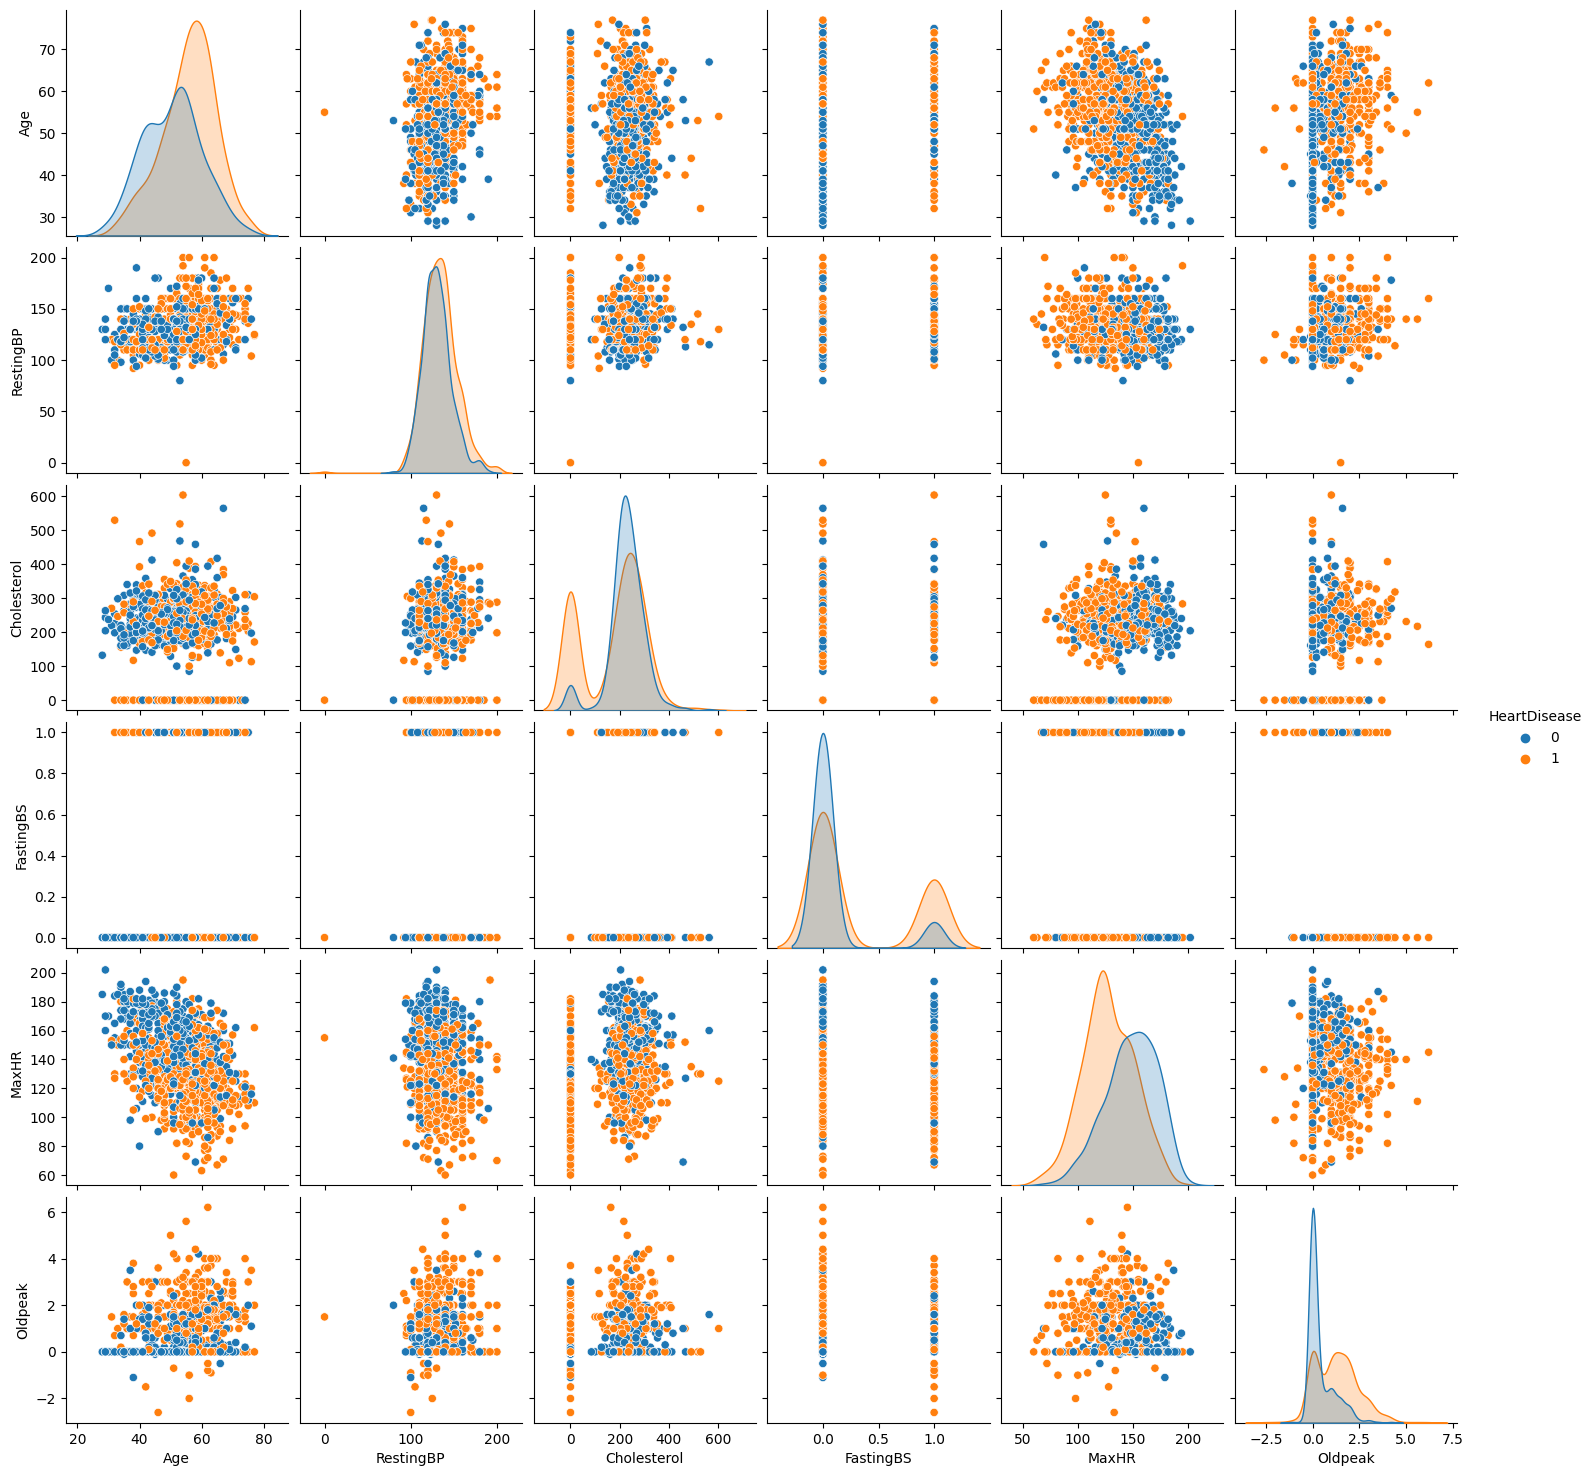

In [ ]:
sns.pairplot(df.loc[:, ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']], diag_kind='kde', hue='HeartDisease')


Con pairplot podemos observar de manera gráfica como se relaciona la salida con cada par de las variables numéricas.

### **Correlación**

Una de las medidas más importantes a la hora de realizar el preanálisis de un dataset es la correlación. Esta medida expresa la relación lineal entre dos variables. Se mide entre -1 y 1. Valores cercanos a -1 indican una alta correlación negativa, los cercanos a 1 una alta correlación positiva y los cercanos a 0 indican falta de correlación.

In [ ]:
df.corr(method='pearson')

<ipython-input-10-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [ ]:
px.imshow(df.corr(method='pearson'),title="Correlacion")

<ipython-input-11-1008db7fdc7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  px.imshow(df.corr(method='pearson'),title="Correlacion")


Como podemos observar tanto en la tabla como en el gráfico, no hay ningún par de variables que muestren correlación positiva ni negativa, ya que todos los valores son cercanos a cero. Debido a ello no hay que realizar ningún tratado especial de los datos.

### **Variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


En esta última tabla podemos observar el número de nulos y el tipo de cada variable. Como podemos observar, no hay nigún nulo en el dataset, lo que nos permite saltarnos el tratamiento de nulos. Por otra parte podemos observar que hay los siguientes números de variables para cada tipo:
- **Int:** 6
- **Foat:** 1
- **Object:** 5

Las variables de tipo Object son Strings, es decir, categóricas. Debido a que los clasificadores que utilizaremos solo funcionan con variables numéricas, habrá que codificar las varibles categóricas.

# **Encoders**

**¿Por que usamos encoders?**

Existen dos tipos de variables:
*   Numéricas
*   Categóricas

Las **variables numericas** son aquellas que representan números y con ellas se pueden realizar operaciones aritméticas.

Las **variables categóricas** son aquellas que no presentan un valor de un número real, sino una categoría; es decir, pueden tomar un valor dentro de un conjunto fijo y limitado de posibles valores, con o sin orden.
En las variables categoricas hay dos subtipos

*   **Nominales** : No depende el orden.
*   **Ordinales** : Hay un orden.

La mayoría de algoritmos solo saben procesar numeros por tanto no pueden procesar las variables categóricas. 
Las máquinas entienden de números, no de texto. Por tanto, tenemos que convertir cada categoría de texto en números para que la máquina pueda procesarlos mediante ecuaciones matemáticas. 

Para transformarlas según el tipo de variable que sea se usa un tipo de codificador u otro.
En nuestro caso:
*   Label Encoder 
*   One Hot Encoder 


El **Label Encoder** es una técnica que a cada label(etiqueta) le asigna un número entero único basado en el orden alfabético.

El **One Hot Encoder** simplemente crea características adicionales basadas en el número de valores únicos en la característica categórica. Cada valor único de la categoría se añadirá como característica.
En esta técnica de codificación, cada categoría se representa como un vector one-hot.

Aplicamos el **One Hot Encoder** cuando:
*  La característica categórica no es ordinal.
*  El número de características categóricas es pequeño (para que sea eficiente).

 
Aplicamos el **Label Encoder** cuando:
* La característica categórica es ordinal .
* El número de categorías es bastante grande( ya que One Hot Encoder) puede consumir mucha memoria.


Segun la técnica usada usaremos un encoder u otro pero al no haber variables ordinales y no ser muchas **la más eficiente debería ser el One Hot Encoder**.










## **LabelEncoder**


Usamos el LabelEncoder para pasar las variables catégoricas a numericas teniendo en cuenta el orden.

In [ ]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0

In [ ]:
X = df_label.drop(['HeartDisease'], axis=1).values
y = df_label['HeartDisease'].values

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size=0.1, random_state = RANDOM_STATE)

### **Escalar datos**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_label_sc= scaler.fit_transform(X_train_label)

X_test_label_sc= scaler.transform(X_test_label)

X_val_label_sc= scaler.transform(X_val_label)

## **One Hot Encoder**


Usamos el OneHotEncoder para pasar las variables catégoricas a numericas sin tener en cuenta el orden.

### **Aplicar One Hot Encoder**

In [ ]:
categ_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_oneHot=pd.get_dummies(df,columns=categ_columns,drop_first=False)
df_oneHot.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

### **Preparar datos**

In [ ]:
X = df_oneHot.drop(['HeartDisease'], axis=1).values
y = df_oneHot['HeartDisease'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train_OH, X_val_OH, y_train_OH, y_val_OH = train_test_split(X_train_OH, y_train_OH, test_size=0.1, random_state = RANDOM_STATE)

X_train_OH.shape, X_test_OH.shape, X_val_OH.shape

((743, 20), (92, 20), (83, 20))

### **Escalar datos**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_OH_sc= scaler.fit_transform(X_train_OH)

X_test_OH_sc= scaler.transform(X_test_OH)

X_val_OH_sc= scaler.transform(X_val_OH)

# **Árboles de decisión**

Un árbol de decisión es un algoritmo de aprendizaje automático supervisado el cuál se utiliza en tareas de clasificación y regresión. Tiene una estructura de árbol jerárquico, con un nodo raíz, ramas, nodos internos y hojas. La técnica consiste en dividir el espacio de los predictores agrupando observaciones con valores similares para una variable. La primera variable que se escoge para dividir el espacio se considera la más discriminatoria.

Una de las principales ventajas de esta técnica es que nos permite ver en todo momento que decisiones ha tomado para dividir el conjunto, por lo que se dice que es un algoritmo de **caja blanca**

A continuación aplicaremos el algoritmo de árbol de decisión para nuestro set de entrenamiento. En este primer ejemplo limitaremos la profundidad del árbol a 4. Además mostraremos el árbol utilizando la biblioteca pyplot.

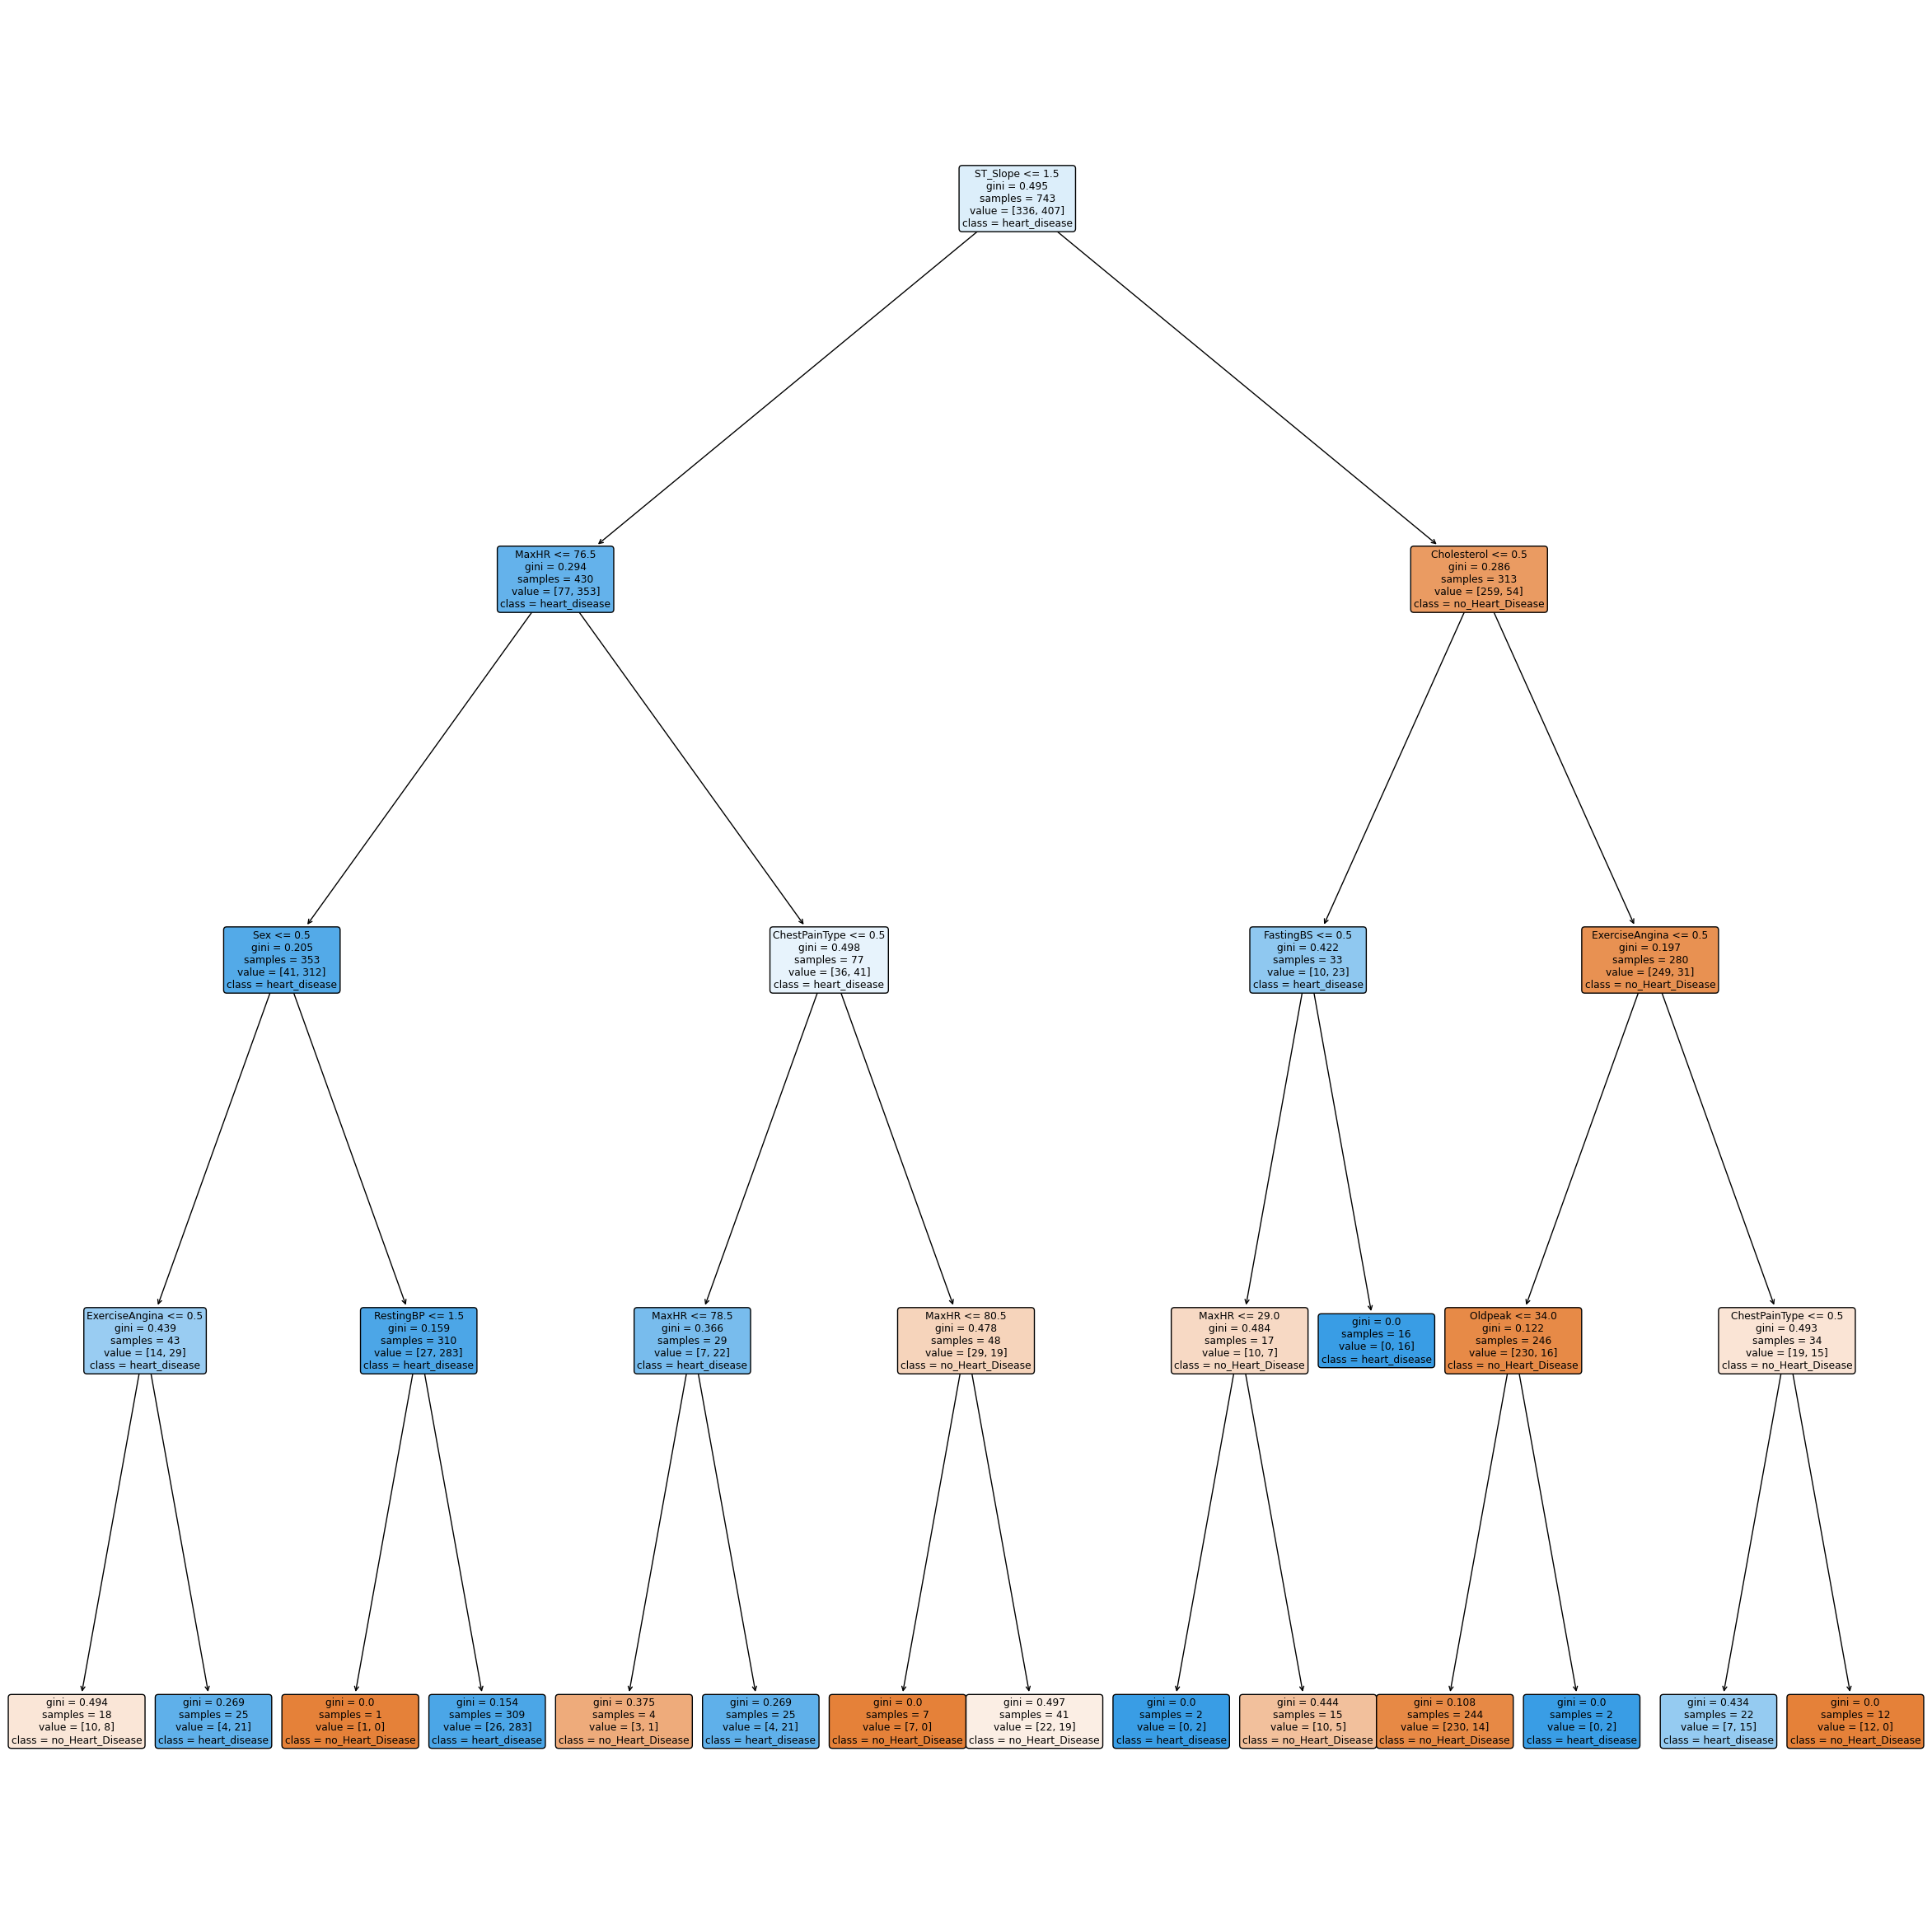

In [ ]:
target_names = ['no_Heart_Disease', 'heart_disease']

clasif = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth = 4)
clasif.fit(X_train_label, y_train_label)
plt.figure(figsize=(30,30))
plot_tree(clasif, filled = True, feature_names = df_label.columns, class_names = target_names, rounded=True)
plt.show()

Al analizar este árbol podemos sacar ciertas conclusiones. La primera es que la variable más discriminatoria es el ST_Slope, ya que es la primera que utiliza el algoritmo para dividir el conjunto de datos. Además, como podemos observar, con 4 de profundidad no es suficiente para que el algoritmo sea capaz de separar completamente a los pacientes con enfermedad de corazón de los que no la tienen. Debido a ello vamos a aplicar el algoritmo de nuevo, esta vez sin límite de profundidad, de forma que no parará hasta haber consegido crear grupos homogeneos en los nodos hojas.

In [ ]:
clasif = DecisionTreeClassifier(random_state = RANDOM_STATE)
clasif.fit(X_train_label, y_train_label)
plt.figure(figsize=(100,100))
plot_tree(clasif, filled = True, feature_names = df_label.columns, class_names = target_names, rounded=True)
plt.show()

In [ ]:
clasif.get_depth()

15

Para que el algoritmo haya sido capaz de dividir completamente el conjunto en enfermos y sanos ha necesitado una profundidad de 15. A continuación, ya con el clasificador entrenado con el set de entrenamiento, lo ejecutaremos con el set de test y mediremos su precisión.

In [ ]:
train_accuracy = clasif.score(X_train_label, y_train_label)
test_accuracy = clasif.score(X_test_label, y_test_label)
print("Precision en el aprendizaje:", train_accuracy)
print("Precision en el test:", test_accuracy)

Precision en el aprendizaje: 1.0
Precision en el test: 0.8043478260869565


Como podemos observar, el clasificador consigue un 100% de pecisión con el set de entrenamiento, pero solo un 80.43% con el de test, la cual no es muy alta. Esto se debe a que, al no haber establecido un límite en la profundidad, el clasificador muestra un **sobreaprendizaje**. Como el entrenamiento no paraba hasta que se dividiese completamente el conjunto de pacientes, el modelo se ha especializado en clasificar a los pacientes del conjunto de entrenamiento y no a los paceintes en general. Debido a ello, hay que ajustar la profundidad máxima. A continuación, utilizaremos el conjunto de validación para comprobar el mejor valor de profundidad máxima junto a otro **hiperparámetro**.

### **Comprobación de hiperparámetros**

Los hiperparámetros que comprobaremos son los siguientes:

- **Profundidad máxima**: Profundidad del árbol a la que cortaremos el entrenamiento.
- **Criterio**: Función utilizada para medir la calidad de la división del conjunto. Utilizaremos dos valores:
  + Gini: Mide el grado de impureza de un nodo.
  + Entropía: Mide el desorden del sistema

In [ ]:
prof_limit = clasif.get_depth() + 1
crit_values = ["gini", "entropy"]
train_accuracies = []
val_accuracies = []

for crit in crit_values:
    train_accuracies_crit = []
    val_accuracies_crit = []
    for prof in range(2, prof_limit):
        clasif = DecisionTreeClassifier(criterion = crit, random_state = RANDOM_STATE, max_depth = prof)
        clasif.fit(X_train_label, y_train_label)
        
        train_accu = clasif.score(X_train_label, y_train_label)
        val_accu = clasif.score(X_val_label, y_val_label)
        
        train_accuracies_crit.append(train_accu)
        val_accuracies_crit.append(val_accu)
    
    train_accuracies.append(train_accuracies_crit)
    val_accuracies.append(val_accuracies_crit)

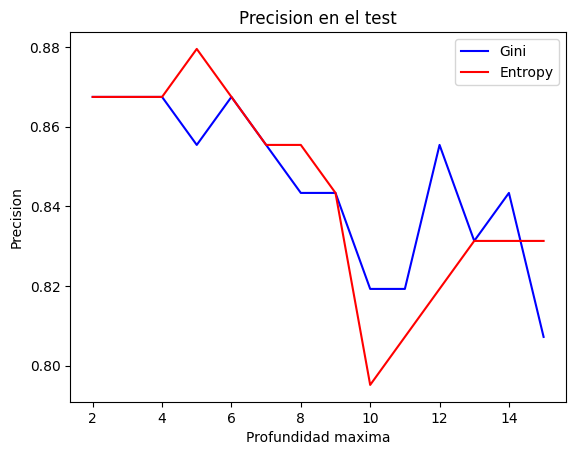

In [ ]:
plt.plot(range(2, prof_limit), val_accuracies[0], label="Gini", color="b")
plt.plot(range(2, prof_limit), val_accuracies[1], label="Entropy", color="r")
plt.title("Precision en el test")
plt.xlabel("Profundidad maxima")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

Como podemos observar en la gráfica, los mejores valores de los hiperparámetros analizados son:
- **Profundidad máxima:** 5
- **Criterio:** Entropía

In [ ]:
max_accu = max_prof = 0
max_crit = None

for crit_num in range(len(crit_values)):
    for prof in range(prof_limit - 2):
        if val_accuracies[crit_num][prof] > max_accu:
            max_accu = val_accuracies[crit_num][prof]
            max_crit = crit_values[crit_num]
            max_prof = prof + 2

print("Mejor criterio:", max_crit)
print("Mejor profundidad:", max_prof)

Mejor criterio: entropy
Mejor profundidad: 5


### **Resultados finales**

Ahora, una vez seleccionados los valores de los hiperparámetros, vamos a volver a ejecutar el modelo con el set de test.

In [ ]:
clasif = DecisionTreeClassifier(criterion = max_crit, random_state = RANDOM_STATE, max_depth = max_prof)
clasif.fit(X_train_label, y_train_label)

train_accuracy = clasif.score(X_train_label, y_train_label)
test_accuracy = clasif.score(X_test_label, y_test_label)
print("Precision en el aprendizaje:", train_accuracy)
print("Precision en el test:", test_accuracy)

Precision en el aprendizaje: 0.8990578734858681
Precision en el test: 0.8369565217391305


Podemos observar que hemos obtenido más de un 3% de mejora en la precisión del test con respecto a la primera versión sin análisis de hiperparámetros ni profundidad máxima. En cambio, la precisión del set de entrenamiento se ha visto reducida de un 100% a un 89.91%. Esto se debe a la disminución del sobreaprendizaje del modelo que hemos obtenido al establecer una profuncidad máxima.

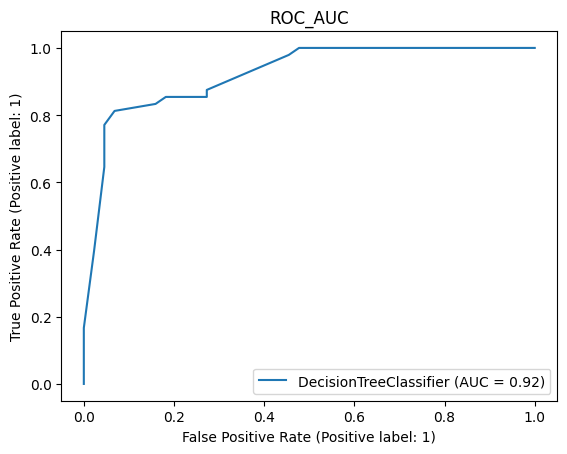

In [ ]:
RocCurveDisplay.from_estimator(clasif, X_test_label,y_test_label)
plt.title('ROC_AUC')
plt.show()

La anterior gráfica muestra la curva ROC de nuestro clasificador, la cual muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos del modelo. Cuanto mayor sea el área de debajo de la curva, mejor es el modelo. Como podemos observar, un nuestro caso el área es bastante grande, por lo que podemos decir que el clasificador ha sido entrenado correctamente.

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.85      0.83      0.84        48

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92



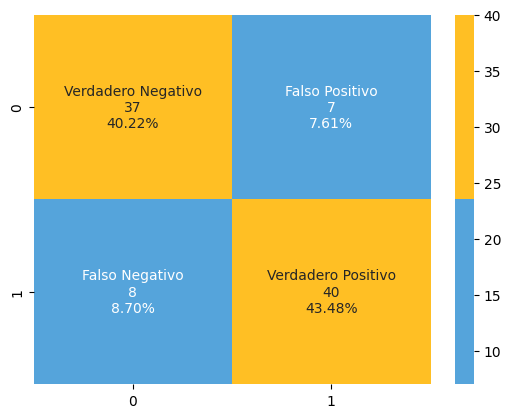

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_label,clasif.predict(X_test_label))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_label,clasif.predict(X_test_label)))

Esta gráfica muestra la matriz de confusión, la cual indica el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Podemos obsrvar que el porcentaje de falsos negativos y positivos no son muy altos, pero son mejorables. A continuación aplicaremos otras técnicas con el fin de mejorar estos números.

# **Naive Bayes**

Un clasificador **Naive Bayes** es un clasificador probabilístico fundamentado en el teorema de Bayes y algunas hipótesis simplificadoras adicionales. Es a causa de estas simplificaciones, que se suelen resumir en la hipótesis de independencia entre las variables predictoras, que recibe el apelativo de naive, es decir, ingenuo.


Naive Bayes es uno de los algoritmos de aprendizaje automático más rápidos y sencillos que nos permite predecir una clase de conjuntos de datos.
Se utiliza para clasificaciones binarias y de clases múltiples.
Es la opción más popular a la hora de resolver problemas de clasificación de texto.
La desventaja principal, por su parte, es que Naive Bayes asume que todas las características son independientes entre sí, de modo que nunca aprende la relación existente entre ellas.

Existen tres tipos de modelo Naive Bayes:

* **Gaussiano**: según este modelo, las características siguen una distribución normal. De modo que, en caso de que los predictores tomen valores continuos en lugar de discretos, el modelo asume que estos valores se muestrean a partir de la distribución gaussiana.
* **Multinomial**: este modelo se usa cuando los datos cuentan con una distribución multinomial.
* **Bernoulli**: el tipo Bernoulli tiene un funcionamiento parecido al multinomial, pero las variables predictoras son las variables booleanas independientes.

Nosotros hemos usado el Bernoulli ya que nuestros datos no siguen una distribucion normal y nuestros resultados son booleanos (tiene riesgo o no).
Para ello hemos usado el algoritmo **BernoulliNB** de la libreria sklearn.


A continuación aplicamos la técnica de Naive Bayes usando los dos encoders.
Sin embargo no habría que usar Label Encoder pero lo hacemos para comprobar si de verdad es mejor el One Hot Encoder.

## **Naive Bayes con Label Encoder**

###**Entrenamiento con diferentes parámetros**

A continuacion vamos a realizar un seleccion de los mejores hiperparámetros usando el conjunto de validación.

Los hiperparámetros que vamos a comprobar con el modelo de regresión logística son los siguientes:
- **Alpha**: Parámetro de suavizado aditivo (Laplace/Lidstone).
- **Fit_prior**: Si se aprenden o no las probabilidades a priori de la clase. Si es falso, se utilizará una prioridad uniforme.


|Param|Values|
|--|--|
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10 |
|fit_prior| True , False |





In [ ]:
alphas = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]
fit_priors = [True, False]

In [ ]:
results = []
for fit_prior in fit_priors:
  for alpha in alphas:
    print('Entrenando... alpha:{alpha} --- fit_prior:{fit_prior} ---'.format(alpha=alpha, fit_prior = fit_prior))
    # Entrenar modelo
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento
    clf.fit(X_train_label_sc, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generar prediccion
    prediction = clf.predict(X_val_label_sc)
    # Calcular accuracy
    accuracy = accuracy_score(y_val_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([alpha,fit_prior,accuracy]) 

print(results)

Entrenando... alpha:1e-05 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.0001 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.001 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.01 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.1 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:1 --- fit_prior:True ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:1e-05 --- fit_prior:False ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.0001 --- fit_prior:False ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.001 --- fit_prior:False ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.01 --- fit_prior:False ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:0.1 --- fit_prior:False ---
    ==> Accuracy: 0.8433734939759037 
 
Entrenando... alpha:1 --

Mostramos los resultados 

In [ ]:
results_df = pd.DataFrame(results,columns=['alpha','fit_prior','accuracy'])
results_df

alpha  fit_prior  accuracy
0   0.00001       True  0.843373
1   0.00010       True  0.843373
2   0.00100       True  0.843373
3   0.01000       True  0.843373
4   0.10000       True  0.843373
5   1.00000       True  0.843373
6   0.00001      False  0.843373
7   0.00010      False  0.843373
8   0.00100      False  0.843373
9   0.01000      False  0.843373
10  0.10000      False  0.843373
11  1.00000      False  0.843373

###**Resultados de los modelos entrenados**

Establecemos un umbral de precisión del 0,75 y cogemos solo los hiperparámetros que lo superen.
Tambien lo ordenamos de mayor a menor y cogemos el que mejor resultado nos haya dado.

In [ ]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

alpha  fit_prior  accuracy
0  0.00001       True  0.843373
1  0.00010       True  0.843373
2  0.00100       True  0.843373
3  0.01000       True  0.843373
4  0.10000       True  0.843373
5  1.00000       True  0.843373
6  0.00001      False  0.843373
7  0.00010      False  0.843373
8  0.00100      False  0.843373
9  0.01000      False  0.843373

In [ ]:
alpha, fit_prior, accuracy = results_top.iloc[0]

params = {'alpha':alpha, 'fit_prior':fit_prior}

params

{'alpha': 1e-05, 'fit_prior': True}

En este caso los mejores hiperparámetros son
- **Alpha**: 1e-05.
- **Fit_prior**: True.

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [ ]:
clf = BernoulliNB(**params)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_label_sc, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB(alpha=1e-05)

Entrenado el modelo ya se puede probar con el método predict_proba() para obtener las probabilidades de cada clase, y el método predict() para obtener la clase más probable.

In [ ]:
pred_prob = clf.predict_proba(X_test_label_sc)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_label_sc)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[3.00349160e-03 9.96996508e-01]
 [9.58937629e-04 9.99041062e-01]
 [4.76888421e-03 9.95231116e-01]
 [9.97171470e-01 2.82853008e-03]
 [3.00349160e-03 9.96996508e-01]
 [9.99263712e-01 7.36287904e-04]
 [9.58937629e-04 9.99041062e-01]
 [3.89136431e-03 9.96108636e-01]
 [9.99293856e-01 7.06143869e-04]
 [3.91859338e-04 9.99608141e-01]
 [1.27140509e-01 8.72859491e-01]
 [8.82806572e-01 1.17193428e-01]
 [9.96996680e-01 3.00331957e-03]
 [3.27599308e-01 6.72400692e-01]
 [4.41884237e-02 9.55811576e-01]
 [6.55564842e-03 9.93444352e-01]
 [9.97470275e-01 2.52972478e-03]
 [3.00853603e-04 9.99699146e-01]
 [8.33307907e-01 1.66692093e-01]
 [3.04687096e-01 6.95312904e-01]
 [1.16393531e-01 8.83606469e-01]
 [8.00757862e-02 9.19924214e-01]
 [3.00853603e-04 9.99699146e-01]
 [9.94077515e-01 5.92248510e-03]
 [9.79633603e-01 2.03663974e-02]
 [1.50009834e-03 9.98499902e-01]
 [7.64942023e-02 9.23505798e-01]
 [7.64942023e-02 9.23505798e-01]
 [9.94700470e-01 5.29953039e-03]
 [

### **Análisis con el mejor de los casos**

A continuación vamos a realizar analizar la precisión obtenida comprobando los resultados con el conjunto de test.

Precisión (Acurracy) :  82.61%
Puntuación de validación cruzada(Cross Validation Score) con Train:  91.56%
Puntuación de validación cruzada(Cross Validation Score) con Val :  95.15%
Puntuación ROC_AUC :  82.58%


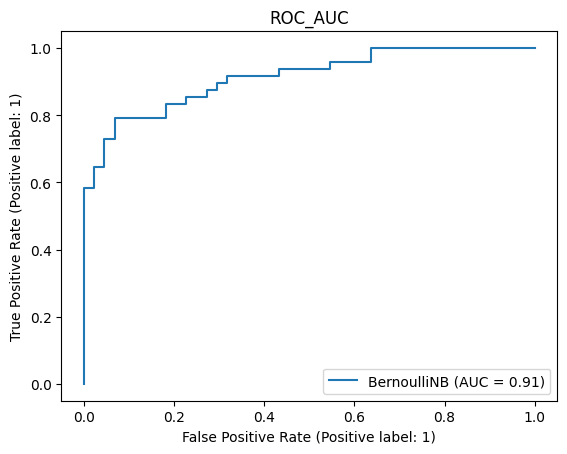

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_label,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train: ",'{0:.2%}'.format(cross_val_score(clf,X_train_label_sc,y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(clf,X_val_label_sc,y_val_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_label,pred)))

RocCurveDisplay.from_estimator(clf, X_test_label_sc,y_test_label)

plt.title('ROC_AUC')
plt.show()

Tras aplicar el BenroulliNb con el Label Encoder obtenemos una precisión del 82.61%.

La anterior gráfica muestra la curva ROC. Como podemos observar el área debajo de la curva ROC es bastante grande, por lo que podemos decir que el clasificador ha sido entrenado correctamente.

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        48

    accuracy                           0.83        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92



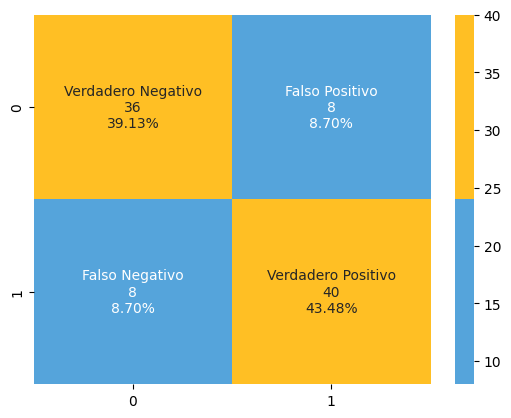

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_label,clf.predict(X_test_label_sc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_label,clf.predict(X_test_label_sc)))

Esta gráfica muestra la matriz de confusión. Podemos observar que el porcentaje de falsos negativos y positivos es de 8.7% (no altos pero tampoco bajos) y son mejorables. A continuación aplicaremos la misma técnica pero con el OneHot Encoder que debería darnos mejores resultados.

## **Naive Bayes con OneHot Encoder**

###**Entrenamiento con diferentes parámetros**

A continuacion vamos a realizar un seleccion de los mejores hiperparámetros usando el conjunto de validación.

Los hiperparámetros que vamos a comprobar son los siguientes:
- **Alpha**: Parámetro de suavizado aditivo (Laplace/Lidstone).
- **Fit_prior**: Si se aprenden o no las probabilidades a priori de la clase. Si es falso, se utilizará una prioridad uniforme.


|Param|Values|
|--|--|
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10 |
|fit_prior| True , False |





In [ ]:
alphas = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]
fit_priors = [True, False]

In [ ]:
results = []
for fit_prior in fit_priors:
  for alpha in alphas:
    print('Entrenando... alpha:{alpha} --- fit_prior:{fit_prior} ---'.format(alpha=alpha, fit_prior = fit_prior))
    # Entrenar modelo
    clf = BernoulliNB(alpha=alpha, fit_prior=fit_prior)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento
    clf.fit(X_train_OH_sc, y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediccion
    prediction = clf.predict(X_val_OH_sc)
    # Calcular accuracy
    accuracy = accuracy_score(y_val_OH,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([alpha,fit_prior,accuracy]) 

print(results)

Entrenando... alpha:1e-05 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.0001 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.001 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.01 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.1 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:1 --- fit_prior:True ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:1e-05 --- fit_prior:False ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.0001 --- fit_prior:False ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.001 --- fit_prior:False ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.01 --- fit_prior:False ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:0.1 --- fit_prior:False ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... alpha:1 --

Mostramos los resultados 

In [ ]:
results_df = pd.DataFrame(results,columns=['alpha','fit_prior','accuracy'])
results_df

alpha  fit_prior  accuracy
0   0.00001       True   0.86747
1   0.00010       True   0.86747
2   0.00100       True   0.86747
3   0.01000       True   0.86747
4   0.10000       True   0.86747
5   1.00000       True   0.86747
6   0.00001      False   0.86747
7   0.00010      False   0.86747
8   0.00100      False   0.86747
9   0.01000      False   0.86747
10  0.10000      False   0.86747
11  1.00000      False   0.86747

###**Resultados de los modelos entrenados**

Establecemos un umbral de precisión del 0,75 y cogemos solo los hiperparámetros que lo superen.
Tambien lo ordenamos de mayor a menor y cogemos el que mejor resultado nos haya dado.

In [ ]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

alpha  fit_prior  accuracy
0  0.00001       True   0.86747
1  0.00010       True   0.86747
2  0.00100       True   0.86747
3  0.01000       True   0.86747
4  0.10000       True   0.86747
5  1.00000       True   0.86747
6  0.00001      False   0.86747
7  0.00010      False   0.86747
8  0.00100      False   0.86747
9  0.01000      False   0.86747

In [ ]:
alpha, fit_prior, accuracy = results_top.iloc[0]

params = {'alpha':alpha, 'fit_prior':fit_prior}

params

{'alpha': 1e-05, 'fit_prior': True}

En este caso los mejores hiperparámetros son:
- **Alpha**: 1e-05.
- **Fit_prior**: True.

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [ ]:
clf = BernoulliNB(**params)  # alpha es el coeficiente de alisado, y fit_prior=True indica que aprenderá prior del conjunto de entrenamiento

clf.fit(X_train_OH_sc, y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan

BernoulliNB(alpha=1e-05)

In [ ]:
pred_prob = clf.predict_proba(X_test_OH_sc)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

pred = clf.predict(X_test_OH_sc)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[1.43372072e-04 9.99856628e-01]
 [8.93415932e-05 9.99910658e-01]
 [5.56463716e-04 9.99443536e-01]
 [9.99987238e-01 1.27618737e-05]
 [1.43372072e-04 9.99856628e-01]
 [9.99994694e-01 5.30637599e-06]
 [2.20102695e-05 9.99977990e-01]
 [1.43372072e-04 9.99856628e-01]
 [9.99978700e-01 2.13003714e-05]
 [9.26095929e-06 9.99990739e-01]
 [1.50422914e-02 9.84957709e-01]
 [8.88108927e-01 1.11891073e-01]
 [9.99943355e-01 5.66454947e-05]
 [3.30446170e-01 6.69553830e-01]
 [8.05128195e-03 9.91948718e-01]
 [2.49475028e-04 9.99750525e-01]
 [9.99949073e-01 5.09270343e-05]
 [3.81716919e-06 9.99996183e-01]
 [7.14387772e-01 2.85612228e-01]
 [8.03759314e-01 1.96240686e-01]
 [3.89459136e-02 9.61054086e-01]
 [1.40604513e-02 9.85939549e-01]
 [3.81716919e-06 9.99996183e-01]
 [9.98734806e-01 1.26519437e-03]
 [9.99945470e-01 5.45295117e-05]
 [1.90555111e-05 9.99980944e-01]
 [1.84515506e-02 9.81548449e-01]
 [6.45408376e-03 9.93545916e-01]
 [9.99262060e-01 7.37939507e-04]
 [

### **Análisis con el mejor de los casos**

A continuación vamos a realizar analizar la precisión obtenida comprobando los resultados con el conjunto de test.

Precisión (Acurracy) :  86.96%
Puntuación de validación cruzada(Cross Validation Score) con Train :  91.68%
Puntuación de validación cruzada(Cross Validation Score) con Val :  94.04%
Puntuación ROC_AUC :  87.03%


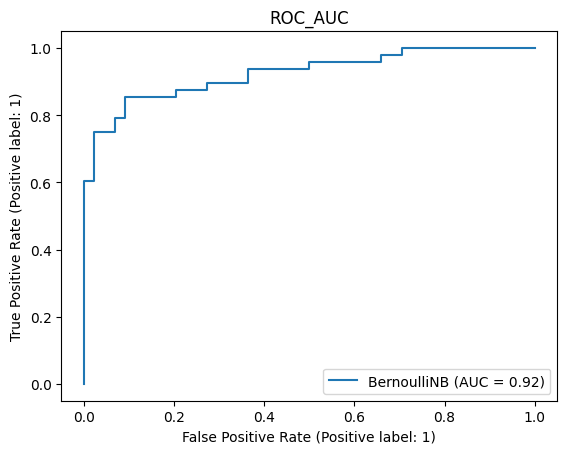

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_OH,pred)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(clf,X_train_OH_sc,y_train_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(clf,X_val_OH_sc,y_val_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_OH,pred)))

RocCurveDisplay.from_estimator(clf, X_test_OH_sc,y_test_OH)

plt.title('ROC_AUC')
plt.show()

Tras aplicar el BenroulliNb con el OneHot Encoder obtenemos una precisión del 86.96%. 

Esta precisión es mejor que la obtenida con el Label Encoder. Gracias a esto podemos ver que si funciona mejor el OneHot Encoder para nuestros datos.

La anterior gráfica muestra la curva ROC de nuestro clasificador. Observamos que el área debajo de la curva ROC es bastante grande, por lo que podemos decir que el clasificador ha sido entrenado correctamente.

**Matriz confusión**

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.89      0.85      0.87        48

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



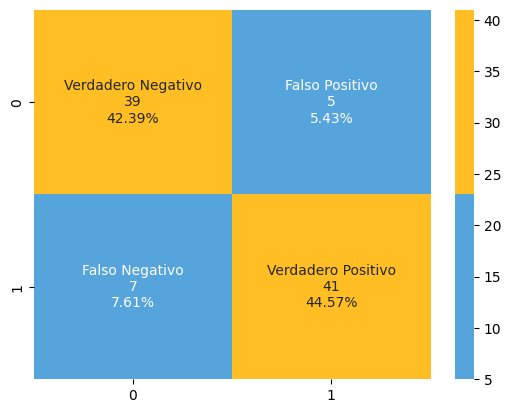

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_OH,clf.predict(X_test_OH_sc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_OH,clf.predict(X_test_OH_sc)))

Esta gráfica muestra la matriz de confusión, la cual indica el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Podemos obsrvar que el porcentaje de falsos negativos y positivos no son muy altos, pero son bastante mejorables. A continuación aplicaremos otras técnica con el fin de mejorar estos números.

# **Support Vector Classifier**

Las support vector machine (SVM) son un conjunto de métodos de aprendizaje supervisado que se utilizan para la clasificación, la regresión y la detección de valores atípicos.

Las ventajas de las SVM son

* Eficaces en espacios de alta dimensión.

* Siguen siendo eficaces cuando el número de dimensiones es mayor que el número de muestras.

* Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados support vectors), por lo que también es eficiente en memoria.

* Versátil: se pueden especificar diferentes funciones de kernel para la función de decisión. Se proporcionan kernels comunes, pero también es posible especificar kernels personalizados.

Las desventajas de las máquinas de vectores soporte incluyen:

* Si el número de características es mucho mayor que el número de muestras, es crucial evitar el sobreajuste al elegir las funciones Kernel y el término de regularización.

La diferencia entre SVM y SVC es segun como clasifica el hiperplano. 
Si el hiperplano clasifica el conjunto de datos linealmente, entonces el algoritmo lo llamamos SVC y su utiliza un enofque no lineal entonces a el algoritmo que separa el conjunto de datos lo llamamos SVM.

Para realizar la clasificacion usamos SVC de la librería sklearn.

A continuación aplicamos la técnica de SVC usando los dos encoders.
Sin embargo no habría que usar Label Encoder pero lo hacemos para comprobar si de verdad es mejor el One Hot Encoder.


## **SVC con Label Encoder**

### **Entrenamiento con diferentes parámetros**

A continuacion vamos a realizar un seleccion de los mejores hiperparámetros usando el conjunto de validación.

Los hiperparámetros que vamos a comprobar con el SVC son los siguientes:
- **Kernel**: Especifica el tipo de núcleo que se utilizará en el algoritmo
- **C**: Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo. La penalización es una penalización l2 al cuadrado.

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|C| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |



In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [ ]:
results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Entrenar modelo
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_label_sc, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generar prediccion
    prediction = classifier_svc.predict(X_val_label_sc)
    # Calcular accuracy
    accuracy = accuracy_score(y_val_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.8554216867469879 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8554216867469879 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8554216867469879 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.8795180722891566 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.8554216867469879 
 
Entrenando... ke

Mostramos los resultados 

In [ ]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

kernel        c  accuracy
0    linear  0.00001  0.638554
1    linear  0.00010  0.638554
2    linear  0.00100  0.855422
3    linear  0.01000  0.855422
4    linear  0.10000  0.855422
5    linear  1.00000  0.867470
6      poly  0.00001  0.638554
7      poly  0.00010  0.638554
8      poly  0.00100  0.638554
9      poly  0.01000  0.638554
10     poly  0.10000  0.879518
11     poly  1.00000  0.855422
12      rbf  0.00001  0.638554
13      rbf  0.00010  0.638554
14      rbf  0.00100  0.638554
15      rbf  0.01000  0.662651
16      rbf  0.10000  0.879518
17      rbf  1.00000  0.891566
18  sigmoid  0.00001  0.638554
19  sigmoid  0.00010  0.638554
20  sigmoid  0.00100  0.638554
21  sigmoid  0.01000  0.855422
22  sigmoid  0.10000  0.855422
23  sigmoid  1.00000  0.795181

###**Resultados de los modelos entrenados**

Establecemos un umbral de precisión del 0,75 y cogemos solo los hiperparámetros que lo superen.
Tambien lo ordenamos de mayor a menor y cogemos el que mejor resultado nos haya dado.

In [ ]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

kernel      c  accuracy
17      rbf  1.000  0.891566
10     poly  0.100  0.879518
16      rbf  0.100  0.879518
5    linear  1.000  0.867470
2    linear  0.001  0.855422
3    linear  0.010  0.855422
4    linear  0.100  0.855422
11     poly  1.000  0.855422
21  sigmoid  0.010  0.855422
22  sigmoid  0.100  0.855422

In [ ]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'rbf', 'C': 1.0}

En este caso los mejores hiperparámetros son:
- **Kernel**: rbf.
- **Fit_prior**: 1.0.

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [ ]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_label_sc,y_train_label)
prediction = classifier_svc.predict(X_test_label_sc)

### **Análisis con el mejor de los casos**

Precisión (Acurracy) :  86.96%
Puntuación de validación cruzada (Cross Validation Score) con Train :  92.23%
Puntuación de validación cruzada (Cross Validation Score) con Val:  93.26%
Puntuación ROC_AUC :  86.93%


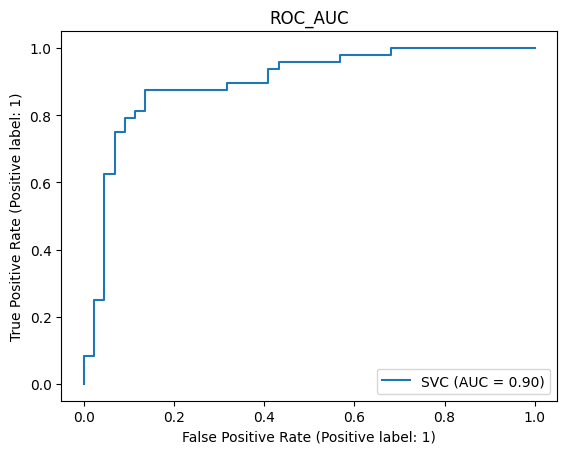

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_label,prediction)))
print("Puntuación de validación cruzada (Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_label_sc,y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada (Cross Validation Score) con Val: ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_label_sc,y_val_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_label,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_label_sc,y_test_label)

plt.title('ROC_AUC')
plt.show()

Tras aplicar el SVC con Label Encoder obtenemos una precisión del 86.96%. 

La anterior gráfica muestra la curva ROC de nuestro clasificador. Como podemos observar, un nuestro caso el área debajo de la curva es bastante grande, por lo que podemos decir que el clasificador ha sido entrenado correctamente.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.88      0.88      0.88        48

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



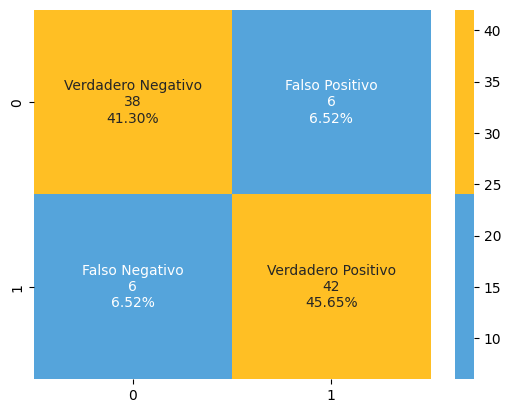

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_label,classifier_svc.predict(X_test_label_sc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_label,classifier_svc.predict(X_test_label_sc)))

Esta gráfica muestra la matriz de confusión. Podemos observar que el porcentaje de falsos negativos y positivos no son muy altos (<7%) , pero son mejorables. A continuación aplicaremos la misma técnica pero con el OneHot Encoder que debería darnos mejores resultados.

## **SVC con OneHot Encoder**

###**Entrenamiento con diferentes parámetros**

A continuacion vamos a realizar un seleccion de los mejores hiperparámetros usando el conjunto de validación.

Los hiperparámetros que vamos a comprobar con el SVC son los siguientes:
- **Kernel**: Especifica el tipo de núcleo que se utilizará en el algoritmo
- **C**: Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positivo. La penalización es una penalización l2 al cuadrado.

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|C| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |



In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [ ]:
results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Entrenar modelo
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_OH_sc, y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan
    # Generar prediccion
    prediction = classifier_svc.predict(X_val_OH_sc)
    # Calcular accuracy
    accuracy = accuracy_score(y_val_OH,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.8795180722891566 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8674698795180723 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8795180722891566 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8795180722891566 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.6385542168674698 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.9156626506024096 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.8795180722891566 
 
Entrenando... ke

Mostramos los resultados 

In [ ]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

kernel        c  accuracy
0    linear  0.00001  0.638554
1    linear  0.00010  0.638554
2    linear  0.00100  0.879518
3    linear  0.01000  0.867470
4    linear  0.10000  0.879518
5    linear  1.00000  0.879518
6      poly  0.00001  0.638554
7      poly  0.00010  0.638554
8      poly  0.00100  0.638554
9      poly  0.01000  0.638554
10     poly  0.10000  0.915663
11     poly  1.00000  0.879518
12      rbf  0.00001  0.638554
13      rbf  0.00010  0.638554
14      rbf  0.00100  0.638554
15      rbf  0.01000  0.710843
16      rbf  0.10000  0.891566
17      rbf  1.00000  0.891566
18  sigmoid  0.00001  0.638554
19  sigmoid  0.00010  0.638554
20  sigmoid  0.00100  0.638554
21  sigmoid  0.01000  0.879518
22  sigmoid  0.10000  0.867470
23  sigmoid  1.00000  0.855422

###**Resultados de los modelos entrenados**

Establecemos un umbral de precisión del 0,75 y cogemos solo los hiperparámetros que lo superen.
Tambien lo ordenamos de mayor a menor y cogemos el que mejor resultado nos haya dado.

In [ ]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

kernel      c  accuracy
10     poly  0.100  0.915663
16      rbf  0.100  0.891566
17      rbf  1.000  0.891566
2    linear  0.001  0.879518
4    linear  0.100  0.879518
5    linear  1.000  0.879518
11     poly  1.000  0.879518
21  sigmoid  0.010  0.879518
3    linear  0.010  0.867470
22  sigmoid  0.100  0.867470

In [ ]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'poly', 'C': 0.1}

En este caso los mejores hiperparámetros son:
- **Kernel**: poly.
- **Fit_prior**: 1.0.

**Entrenamos el modelo con la mejor combinación de hiperparámetros**

In [ ]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_OH_sc,y_train_OH)
prediction = classifier_svc.predict(X_test_OH_sc)

### **Análisis con el mejor de los casos**

A continuación vamos a realizar analizar la precisión obtenida comprobando los resultados con el conjunto de test.

Precisión (Acurracy) :  86.96%
Puntuación de validación cruzada(Cross Validation Score) con Train :  91.60%
Puntuación de validación cruzada(Cross Validation Score) con Val :  94.63%
Puntuación ROC_AUC :  86.65%


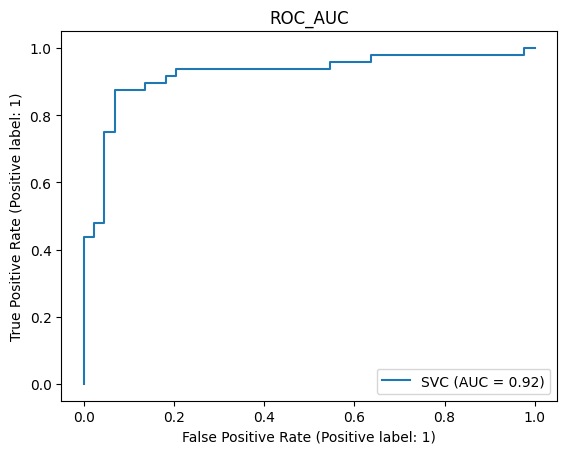

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_OH,prediction)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_OH_sc,y_train_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_OH_sc,y_val_OH, cv = cv ,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_OH,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_OH_sc,y_test_OH)

plt.title('ROC_AUC')
plt.show()

Tras aplicar el SVC con el OneHot Encoder obtenemos una precisión del 86.96%. 

Esta precisión es igual que la obtenida con el Label Encoder, sin embargo podemos ver que la puntuaciones de validación cruzada y ROC_AUC son más altas. Gracias a esto podemos ver que si funciona mejor el OneHot Encoder para nuestros datos.

La anterior gráfica muestra la curva ROC de nuestro clasificador. Como podemos observar, un nuestro caso el área debajo de la curva es bastante grande, por lo que podemos decir que el clasificador ha sido entrenado correctamente.

**Matriz confusion**

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        48

    accuracy                           0.87        92
   macro avg       0.88      0.87      0.87        92
weighted avg       0.88      0.87      0.87        92



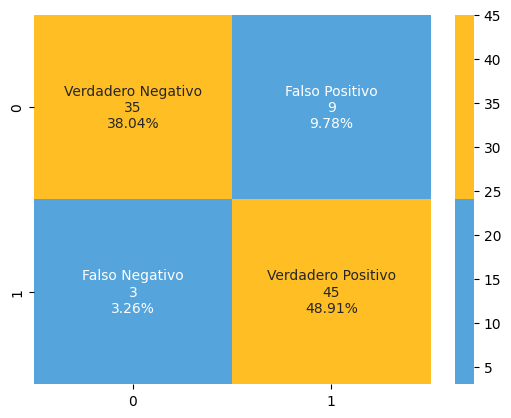

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_OH,classifier_svc.predict(X_test_OH_sc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_OH,classifier_svc.predict(X_test_OH_sc)))

Esta gráfica muestra la matriz de confusión. Podemos observar que el porcentaje de falsos negativos y positivos no son muy altos, pero por ejemplo los falsos positivos son bastante mejorables (10% aprox.) . A continuación aplicaremos otra técnica con el fin de mejorar estos números.

# **Regresión Logística**

Regresión logística es una técnica de análisis de datos en la cual se buscan **relaciones entre dos factores** para luego predecir el valor de uno basado en el otro.
Una de las principales características de esta técnica es el **número finito de resultados** de una predicción, generalmente utilizado como Sí vs No, Aprobado vs Rechazado, entre otros.

La función utilizada por este modelo es la llamada ***función logística o logit*** expresada como:

<img src="https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png" alt="FuncionSigmoid" height="100">

La función logit genera una curva con forma de S representada como:

<img src="https://d1.awsstatic.com/S-curve.36de3c694cafe97ef4e391ed26a5cb0b357f6316.png" alt="FuncionSigmoid" height="300">

Este tipo de función permite que el valor resultante se encuentre entre 0 y 1 facilitando su clasificación en términos binarios.

Para el caso específico del proyecto, esta clasificación se limitará a si el paciente posee riesgo de **tener un ataque cardíaco o no**.

### **Identificar función de coste de acuerdo a la versión de sklearn**

De acuerdo a la librería utilizada (sklearn), a partir de la versión 1.1.0 el parámetro correspondiente a la función de coste pasa a ser *log_loss*, la cual previamente era únicamente *log*.

In [ ]:
if (sklearn.__version__ < "1.1.0"):
  funcion_coste = 'log'
else:
  funcion_coste = 'log_loss'
funcion_coste

'log_loss'

### **Evaluación y comparativa de parámetros**

Con el propósito de identificar la mejor aplicación de regresión logística y obtener mejores resultados de precisión, se han recopilado los principales hiperparámetros que pueden ajustarse con la librería de sklearn, estos son:



*   **penalty**: término de regularización a aplicar.
*   **max_iter**: Número máximo de pasadas por los datos de entrenamiento (aka epochs).
*   **learning_rate**: definición del ritmo de aprendizaje.
*   **alpha**: Constante que multiplica al término de regularización. Entre mayor su valor, mayor regularización. También se utiliza para calcular el ritmo de aprendizaje cuando este último se ha definido como ***optimal***.
*   **eta0**: valor inicial para el ritmo de aprendizaje en los casos que éste se defina como *constant*, *invscaling* o *adaptive*. No se utiliza cuando el ritmo de aprendizaje se define como *optimal*.

 
---
 

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|penalty | None , L1|
|max_iter | 10 , 100 |
|learning_rate | constant , optimal |
|alpha (learning_rate=optimal) | 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10 |
|eta0 (learning_rate=constant) | 0.001 ,	0.01	, 0.1	, 1	, 10 |





In [ ]:
penalties = [None,'l1']
iterations = [10,100]
learning_rates = ['constant','optimal']
alphas = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	, 10]
etas = [0.001 ,	0.01	, 0.1	, 1	, 10]

El siguiente diagrama muestra las combinaciones de hiperparámetros a evaluar para obtener diferentes precisiones e identificar que combinación presenta mejores resultados.

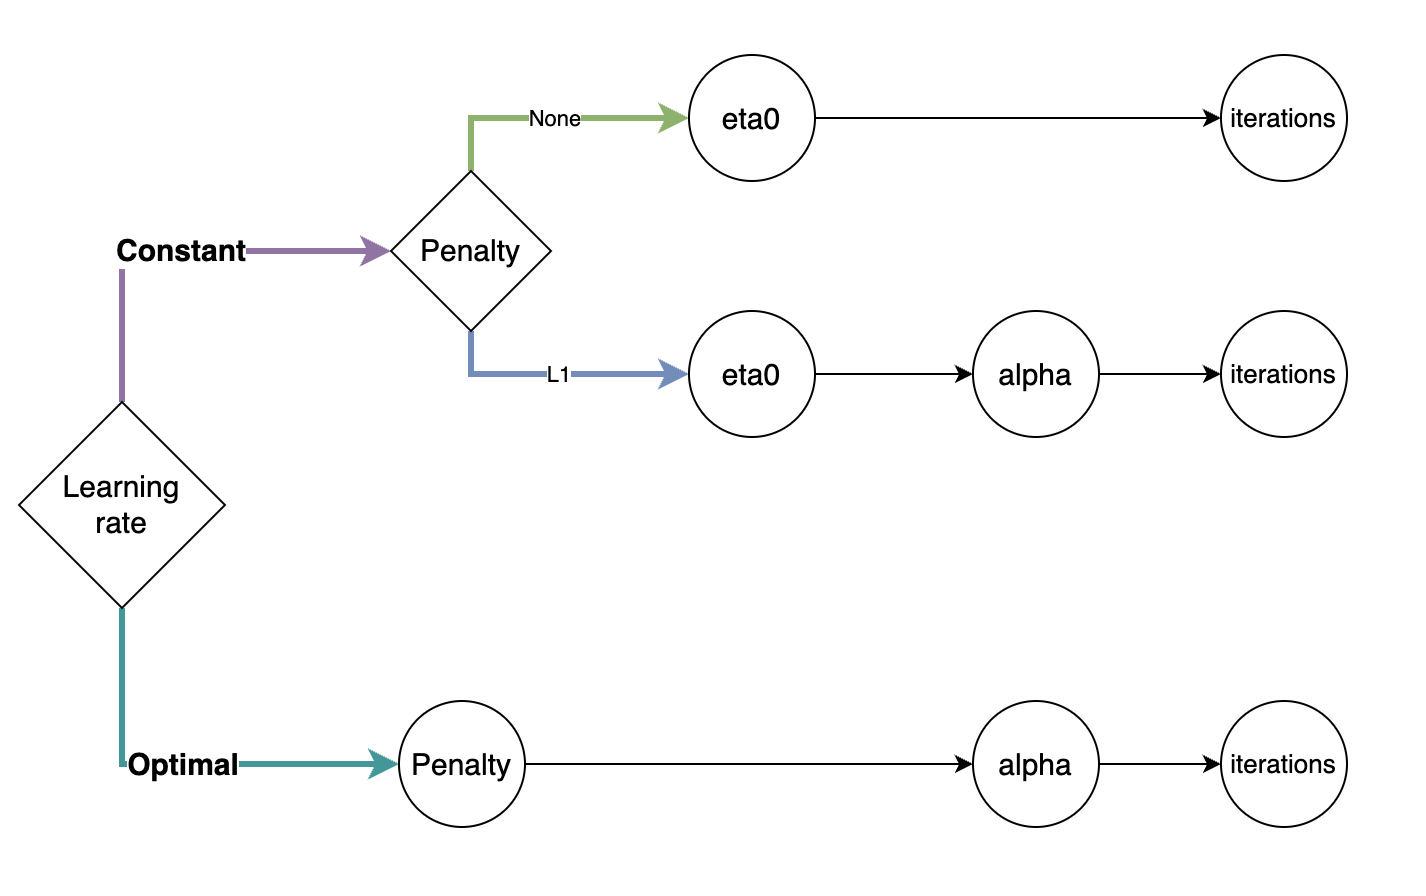

In [ ]:
warnings.filterwarnings('ignore')

## Train Model
def logTrain(args): # penalty, max_iter, learning_rate, alpha, eta0
  log_classifier = SGDClassifier(loss=funcion_coste,  fit_intercept=True, random_state=RANDOM_STATE, **args)
  log_classifier.fit(X_train_OH_sc, y_train_OH)
  # Generate prediction
  prediction = log_classifier.predict(X_test_OH_sc)
  # Calculate accuracy
  accuracy = accuracy_score(y_test_OH,prediction)
  return accuracy

# Table structure
# learning_rate penalty eta alpha max_iterations accuracy 
results = []

for learning_rate in learning_rates:
  for penalty in penalties:
    if learning_rate == 'optimal': # Skip eta0
      for alpha in alphas:
        for iteration in iterations:
          print('=> learning_rate [{rate}] Penalty [{penalty}] eta0 [XX] alpha [{alpha}]  max_iterations [{iteration}]'.format(rate=learning_rate, penalty=penalty, alpha=alpha, iteration=iteration),end='')

          accuracy = logTrain({'learning_rate':learning_rate, 'penalty':penalty, 'max_iter':iteration, 'alpha':alpha })
          
          results.append([learning_rate, penalty, 'XX', alpha, iteration, accuracy])
          print('    ==> Accuracy: {acc} '.format(acc=accuracy))
           
    else:
      if penalty is None:
        for eta in etas:
          for iteration in iterations:
            print('=> learning_rate [{rate}] Penalty [{penalty}] eta0 [{eta}] alpha [XX]  max_iterations [{iteration}]'.format(rate=learning_rate, penalty=penalty, eta=eta, iteration=iteration),end='')

            accuracy = logTrain({'learning_rate':learning_rate, 'penalty':penalty, 'max_iter':iteration, 'eta0':eta })

            results.append([learning_rate, penalty, eta, 'XX', iteration, accuracy])
            print('    ==> Accuracy: {acc} '.format(acc=accuracy))
            
      else:
        for eta in etas:
          for alpha in alphas:
            for iteration in iterations:
              print('=> learning_rate [{rate}] Penalty [{penalty}] eta0 [{eta}] alpha [{alpha}]  max_iterations [{iteration}]'.format(rate=learning_rate, penalty=penalty, eta=eta, alpha=alpha, iteration=iteration),end='')

              accuracy = logTrain({'learning_rate':learning_rate, 'penalty':penalty, 'max_iter':iteration, 'eta0':eta, 'alpha':alpha })

              results.append([learning_rate, penalty, eta, alpha, iteration, accuracy])
              print('    ==> Accuracy: {acc} '.format(acc=accuracy))
              

print("Numero de entrenamientos: {total}".format(total=len(results)))


=> learning_rate [constant] Penalty [None] eta0 [0.001] alpha [XX]  max_iterations [10]    ==> Accuracy: 0.8804347826086957 
=> learning_rate [constant] Penalty [None] eta0 [0.001] alpha [XX]  max_iterations [100]    ==> Accuracy: 0.8695652173913043 
=> learning_rate [constant] Penalty [None] eta0 [0.01] alpha [XX]  max_iterations [10]    ==> Accuracy: 0.8586956521739131 
=> learning_rate [constant] Penalty [None] eta0 [0.01] alpha [XX]  max_iterations [100]    ==> Accuracy: 0.8586956521739131 
=> learning_rate [constant] Penalty [None] eta0 [0.1] alpha [XX]  max_iterations [10]    ==> Accuracy: 0.8152173913043478 
=> learning_rate [constant] Penalty [None] eta0 [0.1] alpha [XX]  max_iterations [100]    ==> Accuracy: 0.8152173913043478 
=> learning_rate [constant] Penalty [None] eta0 [1] alpha [XX]  max_iterations [10]    ==> Accuracy: 0.7608695652173914 
=> learning_rate [constant] Penalty [None] eta0 [1] alpha [XX]  max_iterations [100]    ==> Accuracy: 0.75 
=> learning_rate [consta

**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75 y mostrar los mejores 10 resultados (combinaciones de hiperparámetros).

In [ ]:
results_df = pd.DataFrame(results,columns=['learning rate','penalty','eta0','alpha','max iterations','accuracy'])
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

learning rate penalty   eta0    alpha  max iterations  accuracy
0       constant    None  0.001       XX              10  0.880435
14      constant      l1  0.001    0.001              10  0.880435
31      constant      l1   0.01     0.01             100  0.880435
17      constant      l1  0.001     0.01             100  0.880435
10      constant      l1  0.001  0.00001              10  0.880435
16      constant      l1  0.001     0.01              10  0.880435
12      constant      l1  0.001   0.0001              10  0.880435
61      constant      l1      1      0.1             100  0.869565
60      constant      l1      1      0.1              10  0.869565
47      constant      l1    0.1      0.1             100  0.869565

Se extraen los hiperparámetros del mejor de los resultados de la evaluación realizada:

In [ ]:
learning_rate, penalty, eta, alpha, iteration, accuracy = results_top.iloc[0]

params = {'learning_rate':learning_rate, 'penalty':penalty, 'max_iter':iteration}

if eta is not 'XX':
  params['eta0']=eta

if alpha is not 'XX':
  params['alpha']=alpha

params

{'learning_rate': 'constant', 'penalty': None, 'max_iter': 10, 'eta0': 0.001}

### **Análisis con el mejor de los casos**

Precisión (Acurracy) :  88.04%
Puntuación de validación cruzada(Cross Validation Score) con Train :  92.39%
Puntuación de validación cruzada(Cross Validation Score) con Val :  95.74%
Puntuación ROC_AUC :  88.07%


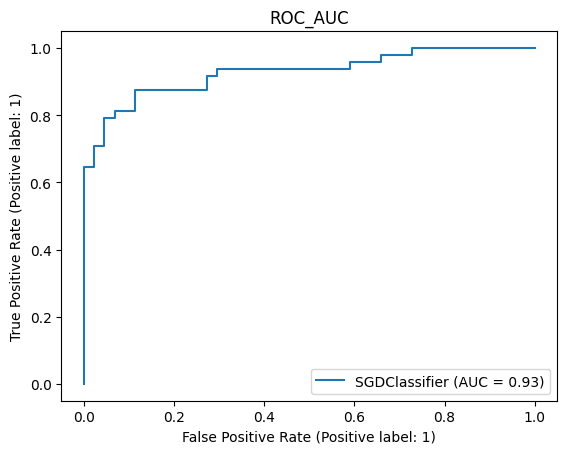

In [ ]:
log_classifier = SGDClassifier(loss=funcion_coste,  fit_intercept=True, random_state=RANDOM_STATE, **params)
log_classifier.fit(X_train_OH_sc, y_train_OH)
# Generate prediction
prediction = log_classifier.predict(X_test_OH_sc)
# Calculate accuracy
accuracy = accuracy_score(y_test_OH,prediction)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_OH,prediction)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(log_classifier,X_train_OH_sc,y_train_OH, cv = cv ,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(log_classifier,X_val_OH_sc,y_val_OH, cv = cv ,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_OH,prediction)))

RocCurveDisplay.from_estimator(log_classifier, X_test_OH_sc,y_test_OH)
plt.title('ROC_AUC')
plt.show()


De acuerdo con la gráfica de la curva ROC, con una puntuación del 0,93, nos indica que tán bien se han clasificado las predicciones, siendo la mejor puntuación lo más cercano a 1.0 y para este caso, la clasificación se encuentra muy bien hecha y lo describe el score AUC.

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.89      0.88      0.88        48

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



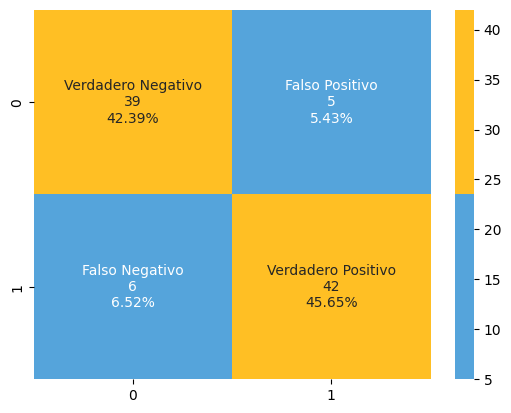

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_OH,log_classifier.predict(X_test_OH_sc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_OH,log_classifier.predict(X_test_OH_sc)))

Como se observa en la matriz de confusión, los casos falsos representan la menor parte de los resultados, aproximadamente el 12%, por lo que tiene mucho sentido que obtengamos un alto valor en el accuracy. Los casos acertados entre Verdadero Negativo y Verdadero Positivo representan exactamente el 88,04%.

# **Redes Neuronales**


Las redes neuronales son una técnica de aprendizaje automático cuyo funcionamiento se base en la simulación del cerebro humano. El modelo contiene unas unidades básicas denominadas neuronas conectadas entre ellas. Estas neuronas se agrupan en capas. Existen tres tipos de capas:
- **Capa de entrada**: es la primera capa y contiene número de neuronas igual al número de variables de entrada del sistema.
- **Capas ocultas**: no hay un número fijo de capas ocultas y contienen un número cualquiera de neuronas.
- **Capa de salida**: es la última capa y contiene un número de neuronas igual al número de variables de salida del sistema.

Cada neurona ejecuta una función de activación con los datos de entrada que recibe y envía como salida el resultado a la siguiente neurona.

Para implementar la red utilizaremos la API Keras, utilizando de fondo Tensorflow.

Las redes que crearemos en este proyecto serán de tipo secuencial. A continuación estableceremos una red sencilla con una capa oculta de 16 neuronas. La capa de entrada tendrá 20 neuronas, que es el número de columnas del dataframe y la de salida tendrá una neurona, ya que solo tenemos una variable de salida: si el paciente tiene o no una enfermedad cardiovascular. Los hiperparámetros en esta primera red serán establecidos de forma arbitraria.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train_OH_sc, y_train_OH, epochs=500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.3594 - binary_accuracy: 0.3674
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2784 - binary_accuracy: 0.5034
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2171 - binary_accuracy: 0.6460
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1777 - binary_accuracy: 0.7510
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1535 - binary_accuracy: 0.7806
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1381 - binary_accuracy: 0.8062
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1279 - binary_accuracy: 0.8223
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1210 - binary_accuracy: 0.8345
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1154 - binary_accuracy: 0.8385
Epoch 10/500
24/24 [==========================

In [ ]:
scores_train = model.evaluate(X_train_OH_sc, y_train_OH)
scores_test = model.evaluate(X_test_OH_sc, y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.1481 - binary_accuracy: 0.8261

binary_accuracy in train: 96.64%

binary_accuracy in test: 82.61%


Analizando los resultados obtenidos por la red neuronal, obtenemos un 82.61% de precisión en el test. Vamos a intentar mejorar este resultado. A continuación añadiremos una capa oculta más.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_OH_sc, y_train_OH, epochs=500)
scores_train = model.evaluate(X_train_OH_sc, y_train_OH)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.6762 - accuracy: 0.5841
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6366
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6770
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7106
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7456
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7699
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7954
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8116
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8143
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8250
Epoch 11/

In [ ]:
scores_train = model.evaluate(X_train_OH_sc, y_train_OH)
scores_test = model.evaluate(X_test_OH_sc, y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8478

accuracy in train: 93.67%

accuracy in test: 84.78%


Con este cambio conseguimos una pequeña mejora en la precisión. Pero la solución no consiste solo en añadir capas ocultas. Vamos a mostrar un ejemplo en el que creamos 10 capas ocultas.

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_focal_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

model.fit(X_train_OH_sc, y_train_OH, epochs=500)

Epoch 1/500
24/24 [==============================] - 2s 4ms/step - loss: 0.1735 - binary_accuracy: 0.5020
Epoch 2/500
24/24 [==============================] - 0s 5ms/step - loss: 0.1731 - binary_accuracy: 0.5437
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 0.1728 - binary_accuracy: 0.5478
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 0.1725 - binary_accuracy: 0.5478
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 0.1723 - binary_accuracy: 0.5478
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 0.1721 - binary_accuracy: 0.5478
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.1719 - binary_accuracy: 0.5478
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 0.1717 - binary_accuracy: 0.5478
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.1715 - binary_accuracy: 0.5478
Epoch 10/500
24/24 [==========================

In [ ]:
scores_train_final = model.evaluate(X_train_OH_sc, y_train_OH)
scores_test_final = model.evaluate(X_test_OH_sc, y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train_final[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test_final[1]*100))

3/3 [==============================] - 0s 7ms/step - loss: 0.2056 - binary_accuracy: 0.8152

binary_accuracy in train: 96.50%

binary_accuracy in test: 81.52%


Como podemos observar, la precisión ha bajado, ya que hemos complicado la red más de lo necesario. Hay que encontrar el número de capas y neuronas adecuado y eso no es tarea fácil, ya que el entrenamiento es mucho más largo en comparación con el resto de técnicas utilizadas. 

### **Comprobación de hiperparámetros**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Train Model
def network_train(optimizer, loss, neuron_num): # penalty, max_iter, learning_rate, alpha, eta0
    model = Sequential()
    model.add(Dense(neuron_num, input_dim=20, activation='relu'))
    model.add(Dense(neuron_num, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['binary_accuracy'])
    
    model.fit(X_train_OH_sc, y_train_OH, epochs=500)
    
    scores_val = model.evaluate(X_val_OH_sc, y_val_OH)

    return scores_val[1] #precision

Los hiperparámetros que vamos a comprobar son los siguientes:
- **Optimizadores**
  + Adam
  + SGD
- **Losses**
  + Binary_crossentropy
  + Binary_focal_crossentropy
  + Hinge
  + Squareed_hinge
- **Número de neuronas**
  + 8
  + 16
  + 20

El número de capas lo dejaremos fijo en 3. La función de activación de la capa de salida será **sigmoide**, ya que es la que mejores resultados ofrece para clasificación binaria. En las capas ocultas utilizaremos **relu**. No comprobamos también estos hiperparámetros ya que el tiempo de ejecución sería demasiado grande. Tras investigar pudimos observar que estos valores son los que mejores resultados deberían dar para nuestro problema.

In [ ]:
results = []
optimizers = ['adam', 'sgd']
losses = ['binary_crossentropy', 'binary_focal_crossentropy', 'hinge', 'squared_hinge']
neurons = [8,16,20]
for optimizer in optimizers:
    for loss in losses:
        for neuron_num in neurons:
            accuracy = network_train(optimizer, loss, neuron_num)
            results.append([optimizer, loss, neuron_num, accuracy])             

print("Numero de combinaciones: {total}".format(total=len(results)))

In [ ]:
results_df = pd.DataFrame(results,columns=['optimizer', 'loss', 'neuron_num', 'accuracy'])
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

Debido a que tarda muchos minutos en ejecutar este fragmento de código, vamos a adjuntar una captura de una de las ejecuciones, para evitar posibles pérdidas de resultados si ejecutamos la casilla sin querer.

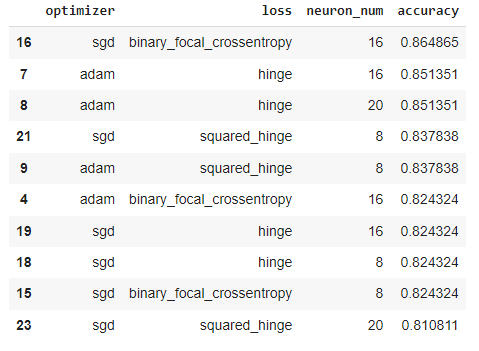

Observamos que los mejores resultados se obtienen usando **SGD** como optimizador, **binary_focal_crossentropy** como loss y **16** neuronas en cada capa oculta.

Creamos la red con la topología e hiperparámetros expuestos previamente:

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_focal_crossentropy',
              optimizer='sgd',
              metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train_OH_sc, y_train_OH, epochs=1000)

Epoch 1/1000
24/24 [==============================] - 1s 2ms/step - loss: 0.2868 - binary_accuracy: 0.3647
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2432 - binary_accuracy: 0.3728
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2202 - binary_accuracy: 0.3970
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.2053 - binary_accuracy: 0.4361
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1940 - binary_accuracy: 0.4818
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1850 - binary_accuracy: 0.5209
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1777 - binary_accuracy: 0.5545
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1712 - binary_accuracy: 0.5949
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1656 - binary_accuracy: 0.6312
Epoch 10/1000
24/24 [================

In [ ]:
scores_train_final = model.evaluate(X_train_OH_sc, y_train_OH)
scores_test_final = model.evaluate(X_test_OH_sc, y_test_OH)
print("\n%s in train: %.2f%%" % (model.metrics_names[1], scores_train_final[1]*100))
print("\n%s in test: %.2f%%" % (model.metrics_names[1], scores_test_final[1]*100))

3/3 [==============================] - 0s 8ms/step - loss: 0.1289 - binary_accuracy: 0.8587

binary_accuracy in train: 93.14%

binary_accuracy in test: 85.87%


Con estos hiperparámetros conseguimos un 85.87% de precisión. Este número podría verse aumentado realizando un estudio más exahustivo de los hiperparámetros y comprobando algunos que no hemos comprobado.

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.85      0.83      0.84        48

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92



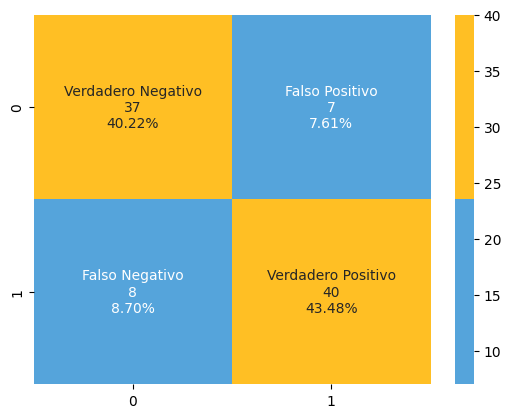

In [ ]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

y_prediction = model.predict(X_test_OH_sc)

y_prediction = np.where(y_prediction > 0.5, 1, 0)

cm = confusion_matrix(y_test_OH,y_prediction)
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_OH,y_prediction))

Analizando la matriz de confusión llegamos a la misma conclusión de antes. El resultado no es malo pero podría verse aumentado.

# **Conclusiones**

Las precisiones (accuracy) obtenidas por cada técnica son las siguientes:

|Técnica|Accuracy|
|--|--|
|Árboles de decisión | 83.69%|
|Naive Bayes | 86.96% |
|Support Vector Classifier | 86.96% |
|Regresión Logística | 88.04% |
|Red Neuronal | 85.87% |

La técnica que peores resultados ofrece es la de los árboles de decisión. Este resultado es el esperado, ya que es la técnica más sencilla y funciona mejor con problemas más simples. 

Naive Bayes es una de las técnicas de clasificación más utilizadas debido a su simplicidad. Por ello no nos sorprende que no haya sido la técnica con mejores resultados, aunque estos no han sido para nada negativos.

El SVC es una técnica que funciona muy bien en problemas con muchas variables de entrada. En nuestro caso, tiene sentido que tenga resultados similares al resto de técnicas, pero en caso de tener un problema mucho más complejo, probablemente esta técnica destacaría sobre la mayoría de los demás clasificadores utilizados.

La regresión logística es una de las técnicas más usadas hoy en día para problemas de clasificación en función de variables independientes. Debido a la popularidad de este clasificador nos esperábamos resultados muy positivos, por lo que no nos ha sorprendido que sea la técnica con mejores resultados.

En cuanto a las redes neuronales, no hemos obtenido unos resultados demasiado altos, ya que solo superan a los árboles de decisión. Esto probablemente se deba a la complejidad de la red en cuando a decidir los hiperparámetros y el número de capas y neuronas. Debido a que se tarda mucho en ejecutar una comprobación exahustiva de hiperparámetros, no hemos podido realizar un estudio tan a fondo como nos hubiese gustado. Probablemente, en caso de haber podido comprobar con mayor profundidad los hiperparámetros y haber probado más topologías de redes, hubiesemos conseguido mejorar los resultados, ya que las redes neuronales son una de las técnicas de clasificación que mayor potencial ofrece.

El tamaño del dataset utilizado no era muy grande, ya que, al ser datos médicos reales, no es sencillo realizar una recopilación de datos. Es posible que utilizando un dataset más grande, que nos permitiese tener un set de entrenamiento mayor, hubiésemos conseguido mejorar el resultado de nuestros predictores.

Es importante asumir que los resultados obtenidos en este proyecto no tienen por que ser iguales para cualquier problema. El resultado de algunas técnicas puede variar en función de los datos de entrada, por lo que podemos obtener conclusiones distintas utilizando otros datasets.

Aunque los resultados ofrecidos por algunas de las técnicas (hasta un 88.04% de accuracy) son bastante buenos, estos clasificadores no deberían ser utilizados en un ámbito profesional para realizar un diagnóstico final. Nunca se deberían tomar decisiones solo teniendo en cuenta la predicción obtenida por estos clasificadores. Aún así, podría ser interesante utilizarlos para saber si acudir al doctor para recibir un diagnóstico real. Si el predictor detecta una posible enfermedad cardiovascular, sería buena idea visitar el hospital, ya que hay un 88.04% de posibilidades de que la predicción sea correcta y tengas una enfermedad de corazón.

## **Trabajo futuro**

Una posible ampliación interesante sería probar los códigos con diferentes datasets que contengan información de distintos ámbitos. De esta forma, podríamos comprobar si los resultados concuerdan con los que hemos obtenido en este proyecto.

Otra posible acción a realizar sería realizar un estudio más exahustivo de los hiperparámetros y la topología de la red neuronal, ya que, como hemos mencionado anteriormente, es una técnica que ofrece mucha opción de mejora en función de los hiperparámetros y topología que utilicemos.

También se podrían incluir nuevas técnicas en el estudio y analizar sus resultados.

# **Bibliografía**

https://theblackboxlab.com/2022/03/30/modelos-naive-bayes/#:~:text=Naive%20Bayes%20es%20uno%20de,cuando%20hablamos%20de%20predicciones%20multiclase.

https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo

https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/#:~:text=The%20limitation%20of%20SVC%20is,we%20call%20it%20as%20SVM.

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


https://www.ibm.com/es-es/topics/decision-trees

https://www.maximaformacion.es/blog-dat/que-son-los-arboles-de-decision-y-para-que-sirven/

https://es.mathworks.com/discovery/roc-curve.html
